<a href="https://colab.research.google.com/github/amunwes/421-recoded/blob/main/421_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 Digital Sampling Basics \&

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math


## Question 1: (Digital Signal Basics)
Consider the following analog sinusoidal signal xa(t)=cos(2p f0 t).






### (a) Sketch (plot) the signal xa(t) for 0≤t≤20 for f0=1, 1.5, and 4 Hz respectively.


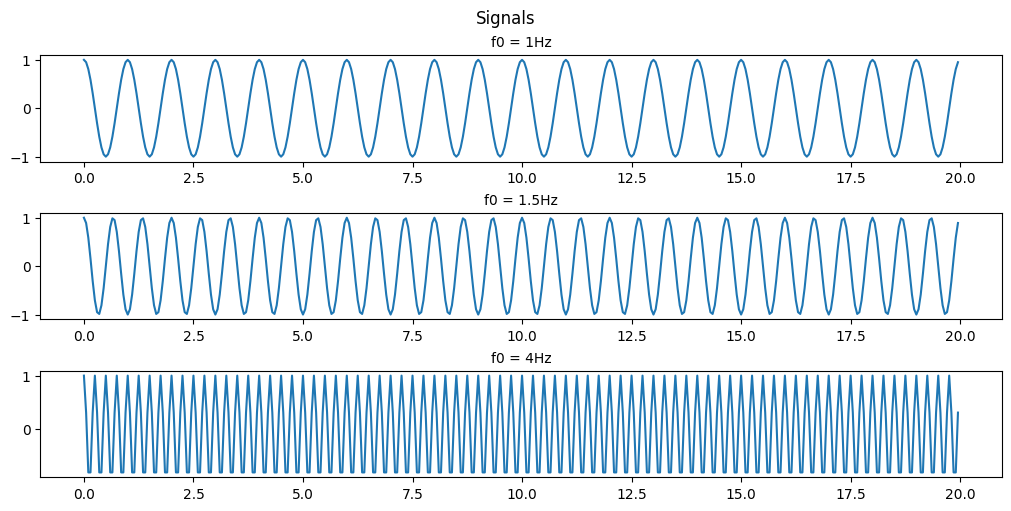

In [ ]:
# setting our time
t = np.arange(0, 20, 0.05)
# setting the frequencies of interest
f1 = 1
f2 = 1.5
f3 = 4

# Using built-in trigonometric function we can directly plot
Y1 = np.cos(2*np.pi*f1*t)
Y2 = np.cos(2*np.pi*f2*t)
Y3 = np.cos(2*np.pi*f3*t)

fig, ax = plt.subplots(3, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Signals')

ax[0].set_title('f0 = 1Hz', fontsize='medium')
ax[0].plot(t,Y1)

ax[1].set_title('f0 = 1.5Hz', fontsize='medium')
ax[1].plot(t,Y2)

ax[2].set_title('f0 = 4Hz', fontsize='medium')
ax[2].plot(t,Y3)

plt.show()

###(b) For the sample rate Fs = 4Hz, plot the digital signal x(n) for 0≤n≤99. Explain the similarities and differences among the various plots (for f0=1, 1.5, and 4 Hz respectively).

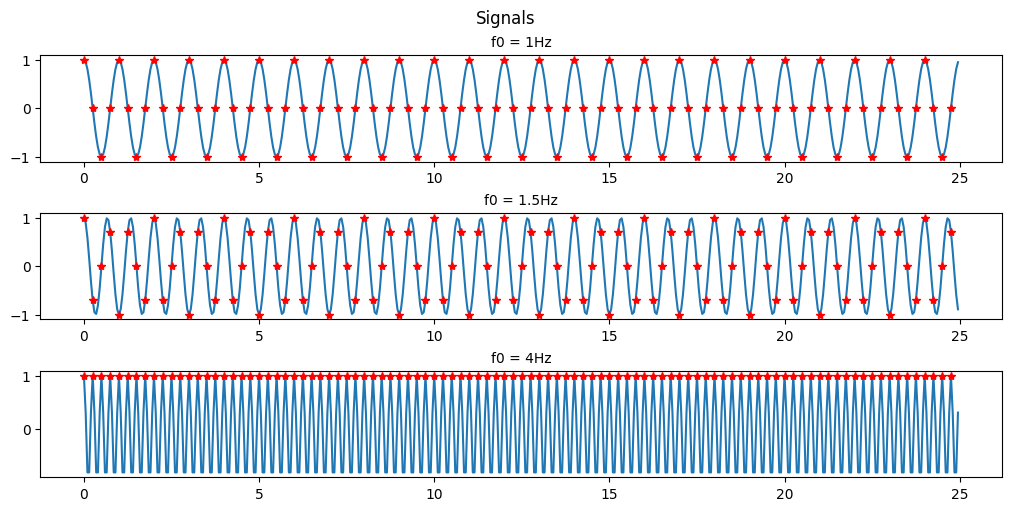

In [ ]:
# setting the frequencies of interest
f1 = 1
f2 = 1.5
f3 = 4
fs = 4
# setting our time
t = np.arange(0, 25, 0.05)
ts = np.arange(0, 25, 1/fs) # 4 points a second for 25 seconds = 100 points or 0<n<99

# Using built-in trigonometric function we can directly plot
Y1 = np.cos(2*np.pi*f1*t)
Y2 = np.cos(2*np.pi*f2*t)
Y3 = np.cos(2*np.pi*f3*t)
Y1s = np.cos(2*np.pi*f1*ts)
Y2s = np.cos(2*np.pi*f2*ts)
Y3s = np.cos(2*np.pi*f3*ts)

fig, ax = plt.subplots(3, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Signals')

ax[0].set_title('f0 = 1Hz', fontsize='medium')
ax[0].plot(t,Y1, ts,Y1s, 'r*')

ax[1].set_title('f0 = 1.5Hz', fontsize='medium')
ax[1].plot(t,Y2, ts,Y2s,'r*')

ax[2].set_title('f0 = 4Hz', fontsize='medium')
ax[2].plot(t,Y3, ts,Y3s, 'r*')

plt.show()

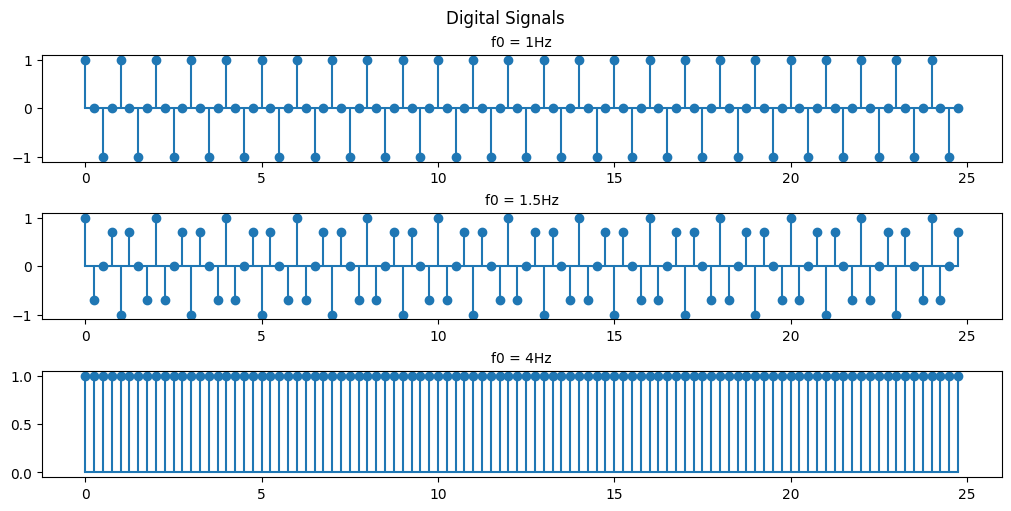

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Digital Signals')

ax[0].set_title('f0 = 1Hz', fontsize='medium')
ax[0].stem(ts, Y1s, basefmt = '')
# ax[0].plot(ts, Y1s, 'g')

ax[1].set_title('f0 = 1.5Hz', fontsize='medium')
ax[1].stem(ts, Y2s, basefmt = '')
# ax[1].plot(ts, Y2s, 'g')

ax[2].set_title('f0 = 4Hz', fontsize='medium')
ax[2].stem(ts, Y3s, basefmt = '')
# ax[2].plot(ts, Y3s, 'g')

plt.show()

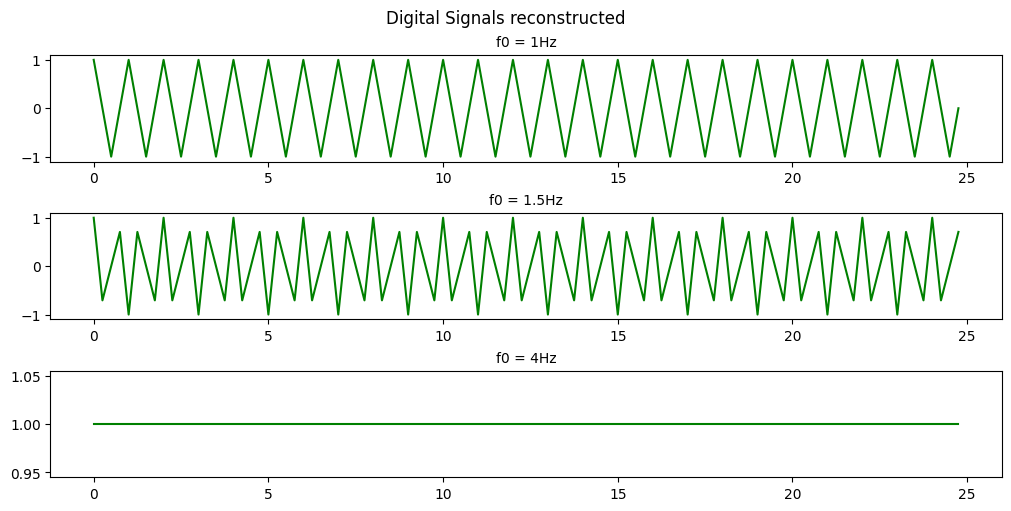

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Digital Signals reconstructed')

ax[0].set_title('f0 = 1Hz', fontsize='medium')
ax[0].plot(ts, Y1s, 'g')

ax[1].set_title('f0 = 1.5Hz', fontsize='medium')
ax[1].plot(ts, Y2s, 'g')

ax[2].set_title('f0 = 4Hz', fontsize='medium')
ax[2].plot(ts, Y3s, 'g')

plt.show()

As you can see with a sample rate of 4Hz we can only recognize the 1Hz and 1.5Hz signals. This is an example of nyquists's theorem.
Nyquist's theorem states that a periodic signal must be sampled at more than twice the highest frequency component of the signal.
In practice, a sample rate somewhat higher than this is necessary.
in the above example we are able to somewhat recreate the 1Hz signal as a saw wave because our sampling frequency is 4x the signal frequency. In the 1.5Hz case we are more than 2x but less than 4x so we can see that a signal exists there be we arent able to accurately recreate it. In the case of the 4Hz signal we are sampling at the signal frequency so we retrieve the same point every cycle resulting in us seeing just a flat signal.


### (c) Suppose that f0 = 5Hz and Fs = 20Hz. Plot the signal x(n). What is the frequency of the signal x(n)?


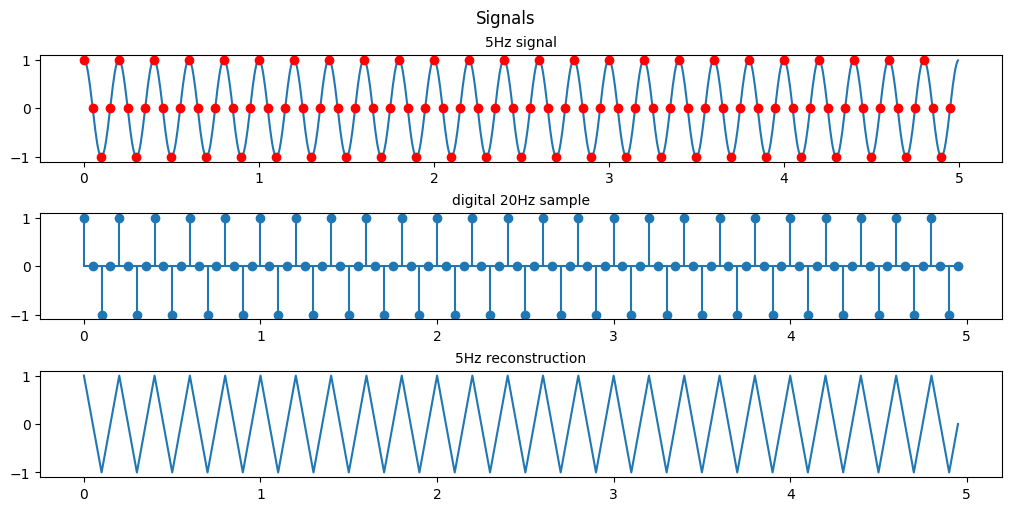

In [ ]:
# setting the frequencies of interest
f0 = 5
fs = 20
# setting our time
t = np.arange(0, 5, 0.005)
ts = np.arange(0, 100*1/fs, 1/fs) # 100 points or 0<n<99

# Using built-in trigonometric function we can directly plot
Y1 = np.cos(2*np.pi*f0*t)
Y1s = np.cos(2*np.pi*f0*ts)

fig, ax = plt.subplots(3, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Signals')

ax[0].set_title('5Hz signal', fontsize='medium')
ax[0].plot(t,Y1, ts,Y1s, 'ro')

ax[1].set_title('digital 20Hz sample', fontsize='medium')
ax[1].stem(ts,Y1s, basefmt = '')

ax[2].set_title('5Hz reconstruction', fontsize='medium')
ax[2].plot(ts, Y1s)


plt.show()

as shown previously since we are sampling at exactly 4x the original signal's frequency the resulting signal is a saw wave seen at the same 5Hz as our original signal.

### (d) Same as in (c), let y(n)=x(2n-1), i.e. by taking the even-numbered samples of x(n), is this a sinusoidal signal? Why? If so, what is its frequency?

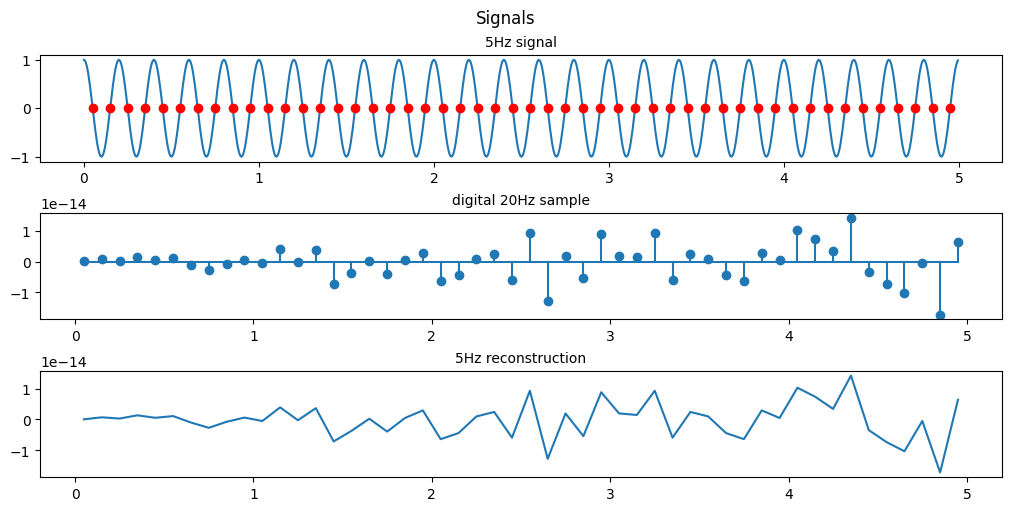

In [ ]:
# setting the frequencies of interest
f0 = 5
fs = 20
# setting our time
t = np.arange(0, 5, 0.005)
ts = np.arange(0, 100*1/fs, 1/fs) # 100 points or 0<n<99

# Using built-in trigonometric function we can directly plot
Y1 = np.cos(2*np.pi*f0*t)
Y1s = np.cos(2*np.pi*f0*ts)

fig, ax = plt.subplots(3, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Signals')

ax[0].set_title('5Hz signal', fontsize='medium')
ax[0].plot(t,Y1, ts[1::2], Y1s[1::2], 'ro')

ax[1].set_title('digital 20Hz sample', fontsize='medium')
ax[1].stem(ts[1::2], Y1s[1::2], basefmt = '')

ax[2].set_title('5Hz reconstruction', fontsize='medium')
ax[2].plot(ts[1::2], Y1s[1::2])


plt.show()

As you can see from the scale the resulting reconstructions are essentially at 0, by looking at every 2nd point we are essentially sampling at 10Hz and since we are sampling 2 points a cycle we just happen to sample exactly at the point the sinusoid crosses 0 everytime.

I'm fairly certain the assignment meant for us to sample the even points (2n) and not the odd points (2n-1) so heres the even sampling

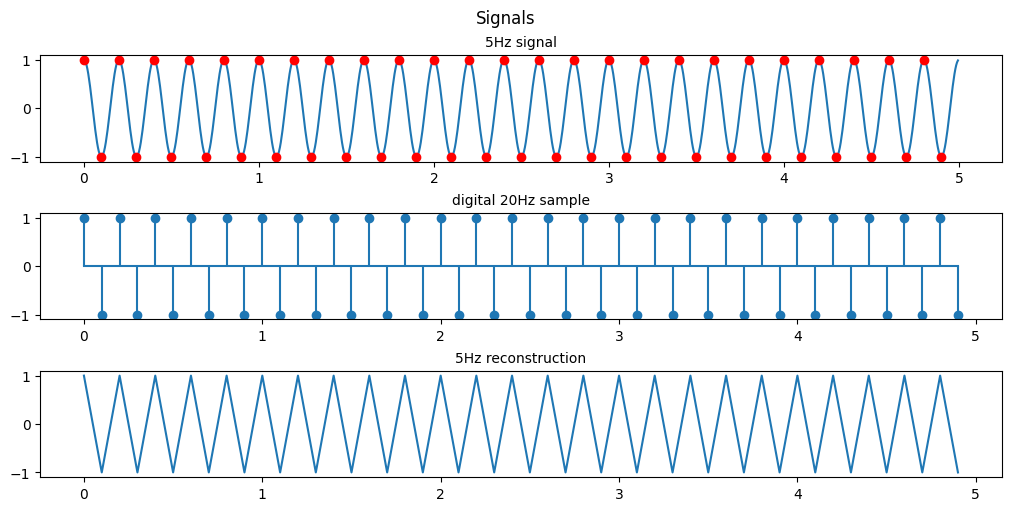

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Signals')

ax[0].set_title('5Hz signal', fontsize='medium')
ax[0].plot(t,Y1, ts[0::2], Y1s[0::2], 'ro')

ax[1].set_title('digital 20Hz sample', fontsize='medium')
ax[1].stem(ts[0::2], Y1s[0::2], basefmt = '')

ax[2].set_title('5Hz reconstruction', fontsize='medium')
ax[2].plot(ts[0::2], Y1s[0::2])


plt.show()

By doing this we manage to reconstruct the same saw wave coincidentally but we are not sampling any points on the 0 crossing so the best estimation we can make is that this is a saw wave.

This phenomenon of reconstructing digital signals by undersampling is called aliasing. When a signal is aliased it essentially means that it is being undersampled and the digital recreation of that signal isnt accurate to what it should be. When we only took odd numbered samples we were given an aliased signal that just looked to be some noise at 0

## Question 2 (EEG Data Processing and Exploration)
we are given EEG data and asked to process it.
EEG data description:
During the experiment, subjects were seated 2 m away from a large computer screen. They were asked to squeeze a pressure responsive bulb with their right
hand in order to match vertical target bars on the screen that represented 25 % of maximum voluntary contraction (MVC). The task consisted of 7 squeezing trials, where each trial contained 10 seconds of rest period followed by 2 seconds of squeezing. EEG signals are sampled at 250 Hz.

Please download both ‘pdData.mat’ (the EEG data for a subject with Parkinson’s disease) and ‘normalData.mat’ (the EEG data for a normal subject). Each data file contains three variables:
* data (number of channels x number of timepoints)
* ampVec (1 x number of timepoints); ampVec(t)=1 during squeezing, amp(t)=0 during rest
* channel_name (1xnumber of channels)

In [ ]:
# metadata_df = pd.read_table('/content/gdrive/MyDrive/data/imdb_movies_dataset/movie.metadata.tsv', header=None)
# /content/drive/MyDrive/Colab Notebooks/Colab data/normalData.mat
# /content/drive/MyDrive/Colab Notebooks/Colab data/pdData.mat
import scipy.io
import numpy.ma as ma

# Load MATLAB file
normal_data = scipy.io.loadmat('/content/gdrive/MyDrive/Colab Notebooks/Colab data/normalData.mat')
parkinsons_data = scipy.io.loadmat('/content/gdrive/MyDrive/Colab Notebooks/Colab data/pdData.mat')

# dimensions of the data, there are 19 nodes and they've each gathered data for 21000 steps
#19 nodes, 21000 samples
width, length = np.shape(normal_data['data'])


###(a) Plot the second EEG node, plot the data.

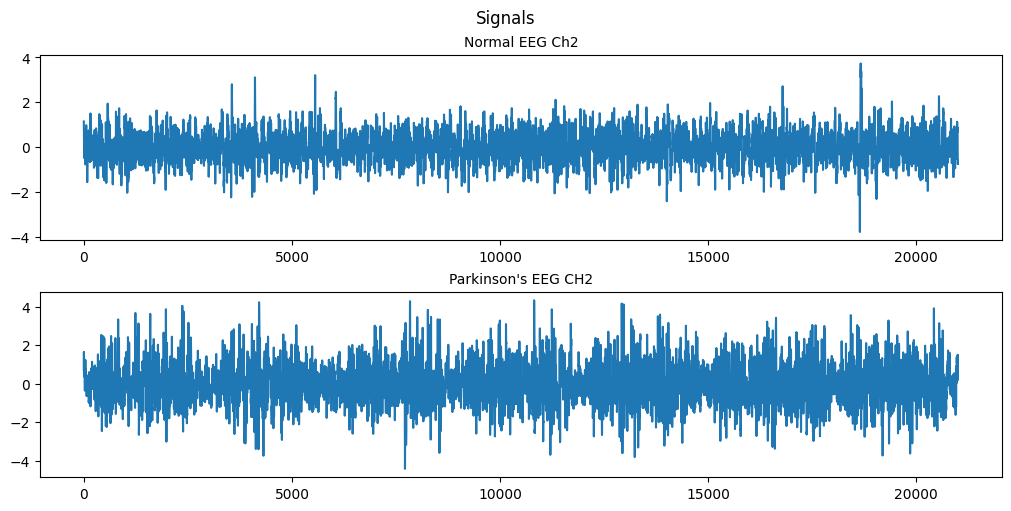

In [ ]:
# setting our range
n = np.arange(0, length, 1)
CH2_norm = normal_data['data'][1]
CH2_park = parkinsons_data['data'][1]

fig, ax = plt.subplots(2, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Signals')

ax[0].set_title('Normal EEG Ch2', fontsize='medium')
ax[0].plot(n, CH2_norm)


ax[1].set_title('Parkinson\'s EEG CH2', fontsize='medium')
ax[1].plot(n, CH2_park)


plt.show()


###(b) Separate the data into the rest part and the squeezing part based on the vector ampVec.


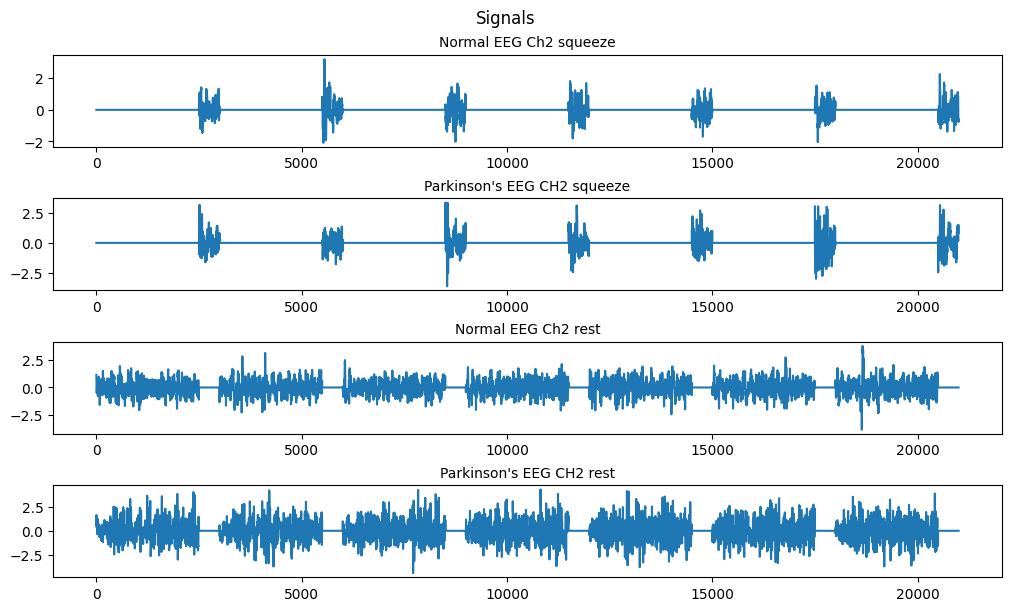

In [ ]:
# creating the masks
norm_mask = np.tile(normal_data['ampVec'], (width,1))
park_mask = np.tile(parkinsons_data['ampVec'], (width,1))


norm_rst = ma.masked_array(normal_data['data'], mask=norm_mask, fill_value=0)
park_rst = ma.masked_array(parkinsons_data['data'], mask=park_mask, fill_value=0)

norm_sqz = ma.masked_array(normal_data['data'], mask=np.logical_not(norm_mask), fill_value=0)
park_sqz = ma.masked_array(parkinsons_data['data'], mask=np.logical_not(park_mask), fill_value=0)

fig, ax = plt.subplots(4, 1, figsize=(10, 6), layout='constrained')
fig.suptitle('Signals')

# nsq = len(norm_sqz.compressed())

ax[0].set_title('Normal EEG Ch2 squeeze', fontsize='medium')
ax[0].plot(n, norm_sqz[1].filled())

ax[1].set_title('Parkinson\'s EEG CH2 squeeze', fontsize='medium')
ax[1].plot(n, park_sqz[1].filled())

ax[2].set_title('Normal EEG Ch2 rest', fontsize='medium')
ax[2].plot(n, norm_rst[1].filled())

ax[3].set_title('Parkinson\'s EEG CH2 rest', fontsize='medium')
ax[3].plot(n, park_rst[1].filled())


plt.show()
# squeeze = A.data(:,~~A.ampVec);
# squeezeP = B.data(:,~~B.ampVec);
# rest = A.data(:,~A.ampVec);
# restP = B.data(:,~B.ampVec);
# sl = size(squeeze,2);
# rl = size(rest,2);

Using the numpy.ma module we can make use of masked arrays.
since our amp vec data is a binary telling us whether we're in the squeeze or rest state we can use it to apply a mask to our data sets resulting in the above plots.

since we want to analyze the data we can use the .compressed() method to compress the masked array to only valid values.

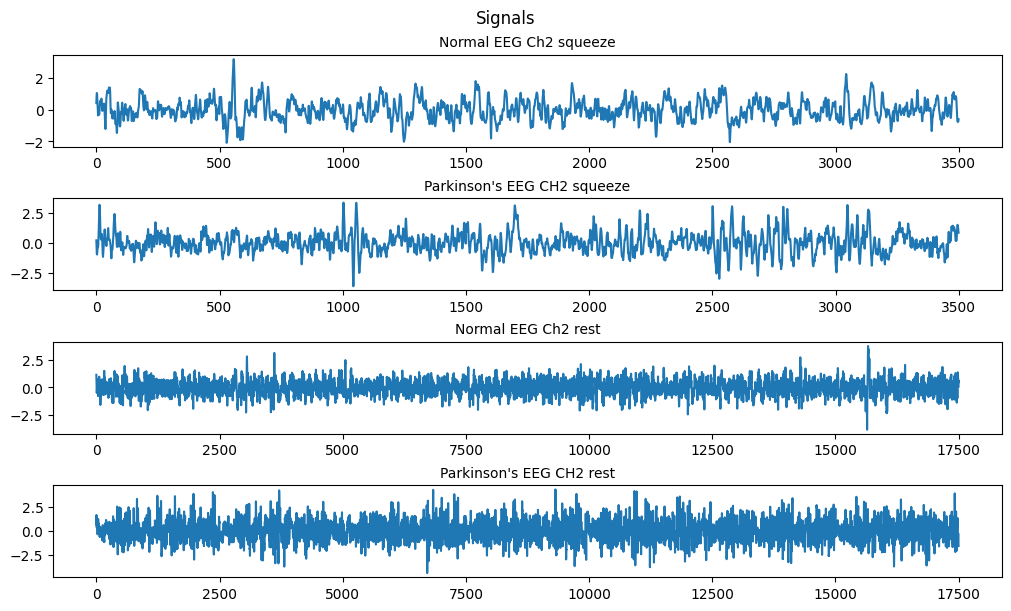

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(10, 6), layout='constrained')
fig.suptitle('Signals')

# nsq = len(norm_sqz.compressed())

ax[0].set_title('Normal EEG Ch2 squeeze', fontsize='medium')
ax[0].plot(np.arange(0, len(norm_sqz[1].compressed()), 1), norm_sqz[1].compressed())

ax[1].set_title('Parkinson\'s EEG CH2 squeeze', fontsize='medium')
ax[1].plot(np.arange(0, len(park_sqz[1].compressed()), 1), park_sqz[1].compressed())

ax[2].set_title('Normal EEG Ch2 rest', fontsize='medium')
ax[2].plot(np.arange(0, len(norm_rst[1].compressed()), 1), norm_rst[1].compressed())

ax[3].set_title('Parkinson\'s EEG CH2 rest', fontsize='medium')
ax[3].plot(np.arange(0, len(park_rst[1].compressed()), 1), park_rst[1].compressed())


plt.show()

### (c) Based on the EEG data of the ‘rest’ state, calculate the covariance matrix C_r; Based on the EEG data of the ‘squeezing’ state, calculate the covariance matrix C_s.

Here we want to calculate the covariance matrix between all 19 of our EEG nodes.

"In probability theory and statistics, a covariance matrix is a square matrix giving the covariance between each pair of elements of a given random vector." [https://en.wikipedia.org/wiki/Covariance_matrix](https://en.wikipedia.org/wiki/Covariance_matrix)

"Covariance is a measure to indicate the extent to which two random variables change in tandem. Correlation is a measure used to represent how strongly two random variables are related to each other. Covariance is nothing but a measure of correlation. Correlation refers to the scaled form of covariance." [source for additional reading](https://www.mygreatlearning.com/blog/covariance-vs-correlation/#:~:text=Covariance%20is%20a%20measure%20to,the%20scaled%20form%20of%20covariance.)

numpy has a convenient function for calculating this np.cov()


In [ ]:
# ma.masked_array(normal_data['data'], mask=normal_data['ampVec'], fill_value=0)
# normal_data['data']
# normal_data['data'][2]
# norm_mask = np.tile(normal_data['ampVec'], (width,1))
np.shape(norm_rst)
np.cov(norm_sqz)


In [ ]:
from matplotlib.colors import ListedColormap
wht = ListedColormap(["white"])
#being  lazy i made a white colormap to reuse code ffrom my heatmap plots for matrix plots

xs = range(width)
ys = range(width)

labels = []
for i in normal_data['channel_name']:
  for j in i:
    for k in j:
      labels.append(k)

def format_fn(tick_val, tick_pos):
    if int(tick_val) in xs:
        return labels[int(tick_val)]
    else:
        return ''


In [ ]:
C_r = np.cov(norm_rst)
C_s = np.cov(norm_sqz)
C_rp = np.cov(park_rst)
C_sp = np.cov(park_sqz)

print("shapes of covariance matrices between 19 EEG nodes: ")
print("C_s:", np.shape(C_s))
print("C_r:", np.shape(C_r))
print("C_sp:", np.shape(C_sp))
print("C_rp:", np.shape(C_rp))

shapes of covariance matrices between 19 EEG nodes: 
C_s: (19, 19)
C_r: (19, 19)
C_sp: (19, 19)
C_rp: (19, 19)


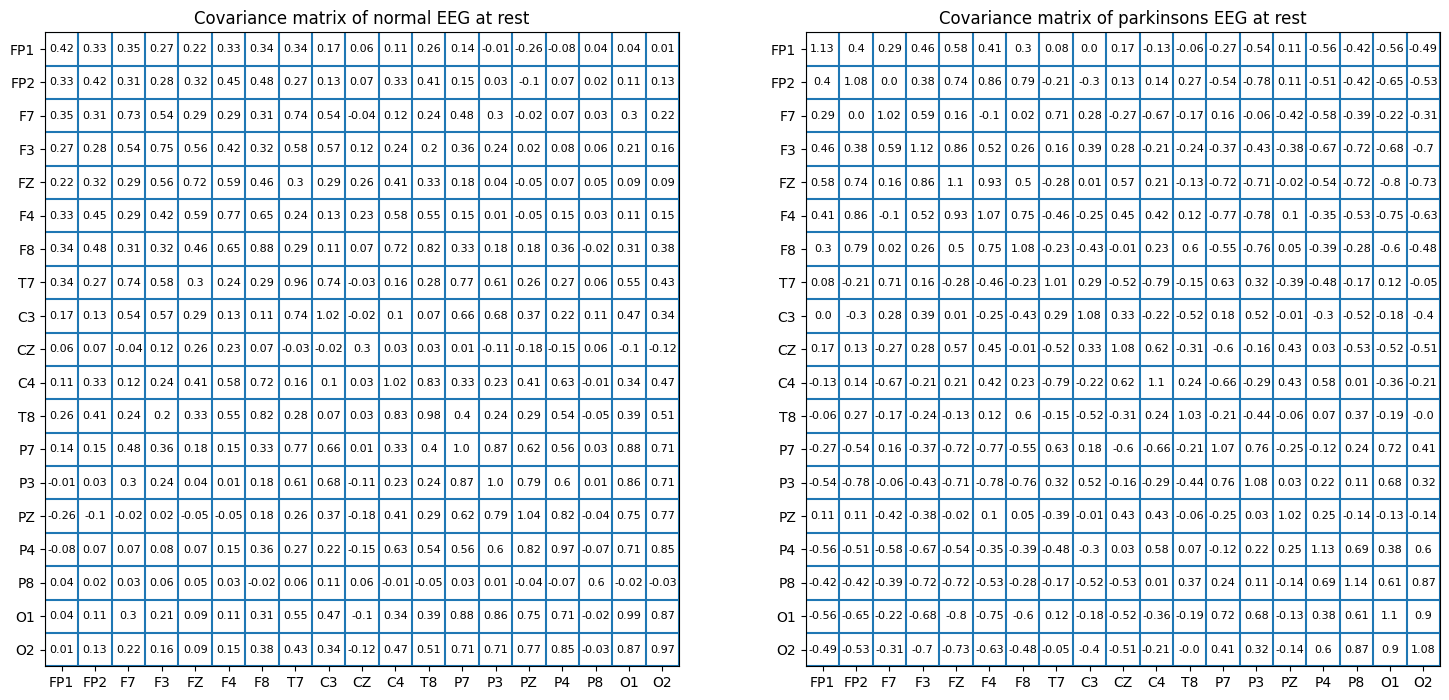

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(18, 9))

im1 = ax[0].imshow(C_r, cmap=wht)
im2 = ax[1].imshow(C_rp, cmap=wht)
# im.set_clim(-1, 1)
ax[0].grid(False)
# ax.autoscale(False)
ax[0].xaxis.set_major_locator(plt.MaxNLocator(19))
ax[0].yaxis.set_major_locator(plt.MaxNLocator(19))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(19))
ax[1].yaxis.set_major_locator(plt.MaxNLocator(19))

# A FuncFormatter is created automatically.
ax[0].xaxis.set_major_formatter(format_fn)
ax[0].yaxis.set_major_formatter(format_fn)
ax[1].xaxis.set_major_formatter(format_fn)
ax[1].yaxis.set_major_formatter(format_fn)

ax[0].set_title('Covariance matrix of normal EEG at rest', fontsize='large')
ax[1].set_title('Covariance matrix of parkinsons EEG at rest', fontsize='large')

ax[0].hlines(y=np.arange(width+1)- 0.5, xmin=-0.5, xmax=width-0.5)
ax[0].vlines(x=np.arange(width+1) - 0.5, ymin=-0.5, ymax=width-0.5)
ax[1].hlines(y=np.arange(width+1)- 0.5, xmin=-0.5, xmax=width-0.5)
ax[1].vlines(x=np.arange(width+1) - 0.5, ymin=-0.5, ymax=width-0.5)

for i in xs:
    for j in ys:
        ax[0].text(j, i, round(C_r[i, j], 2), ha='center', va='center', color='black', size=8)

for i in xs:
    for j in ys:
        ax[1].text(j, i, round(C_rp[i, j], 2), ha='center', va='center', color='black', size=8)
# cbar = ax[0].figure.colorbar(im1, ax=ax, format='% .2f')
plt.show()

For obvious reasons I'm not going to be showing the remaining matrix's but the code is there and is publicly available.


## (d) Based on the EEG data of the ‘rest’ state, calculate the matrix R of correlation coefficients, and comment on the dependencies between the EEG nodes.
(You can use ‘mesh’ commend to display the matrix R.) Compare the differences between the
Pakinson’s disease subject the normal subject (e.g. based on features such as the
**eigenvalues** of R; For each EEG node k, calculate the **summation** of R(k,j) over j and use
such summations as features for comparison) and comment on your results.

"A correlation matrix is a square matrix showing the correlation coefficients between two variables. Correlation coefficients measure how strong and in which direction two variables are linked in a straight line. A correlation matrix often examines how different variables relate in multivariate analysis and statistics." [What is a correlation matrix](https://www.questionpro.com/blog/correlation-matrix/#:~:text=A%20correlation%20matrix%20is%20a%20square%20matrix%20showing%20the%20correlation,in%20multivariate%20analysis%20and%20statistics.)

in simple terms the correlation matrix shows how closely linked individual variables are. normalized so that the closer to 1 the more perfectly linked the 2 variables are, -1 shows an inverse relationship and 0 would reflect no relationship.

A math major would have a better time explaining the intuition behind eigenvalues and eigenvectors and I don't want to go down a rabbit hole trying to justify it. But the simplest explanation is that they are characteristic values of the matrix which are defined by the Matrix' transformations.
Eigenvalues are scalars used to transform eigenvectors, and Eigenvectors are vectors that do not change direction when a linear transformation is applied. in our case we can just treat them as features of importance, for each EEG node we will have an Eigenvalue and the magnitude of that Eigenvalue corresponds to how much influence that node has on the 19-dimensional space made up of our 19 EEG nodes.

For a matrix A we have the Eigenvalues λ
Ax = λx [extra reading on Eigenvalues/vectors](https://byjus.com/maths/eigen-values/#:~:text=Eigenvalue%20Definition&text=In%20Mathematics%2C%20an%20eigenvector%20corresponds,of%20the%20transformation%20is%20negative.)

The summation of the correlation matrix over each column will roughly tell you how much influence that particular feature has on the rest of the features taking the mean will get you the average influence. In other words in this particular case it will tell you which of the EEG nodes has the biggest effect on the others, which part of the brain's activity has the most influence on other parts of the brain.

The code is here to calculate all the features of interest but for the sake of time I wont be displaying the tables. The mesh command is useful in matlab but isn't as meaningful in jupyter notebook format where you can't interact with it so instead I've used heatmaps to show the correlation between nodes. An example of the mesh representation of the data can be seen at the end in the appendix, its essentially a 3D representation of a heatmap.

In [ ]:
# R correlation matrix
R_r = np.corrcoef(norm_rst)
R_s = np.corrcoef(norm_sqz)
R_rp = np.corrcoef(park_rst)
R_sp = np.corrcoef(park_sqz)
# Eigenvalues of R
ER_r,_ = np.linalg.eig(R_r)
ER_rp,_= np.linalg.eig(R_rp)
ER_s,_ = np.linalg.eig(R_s)
ER_sp,_= np.linalg.eig(R_sp)
# summation
S_r = np.sum(R_r, axis=0)
S_rp= np.sum(R_rp, axis=0)
S_s = np.sum(R_s, axis=0)
S_sp= np.sum(R_sp, axis=0)

# print("ER_r: " , ER_r)
# print("ER_rp: " , ER_rp)
# print("ER_s: " , ER_s)
# print("ER_sp: " , ER_sp)


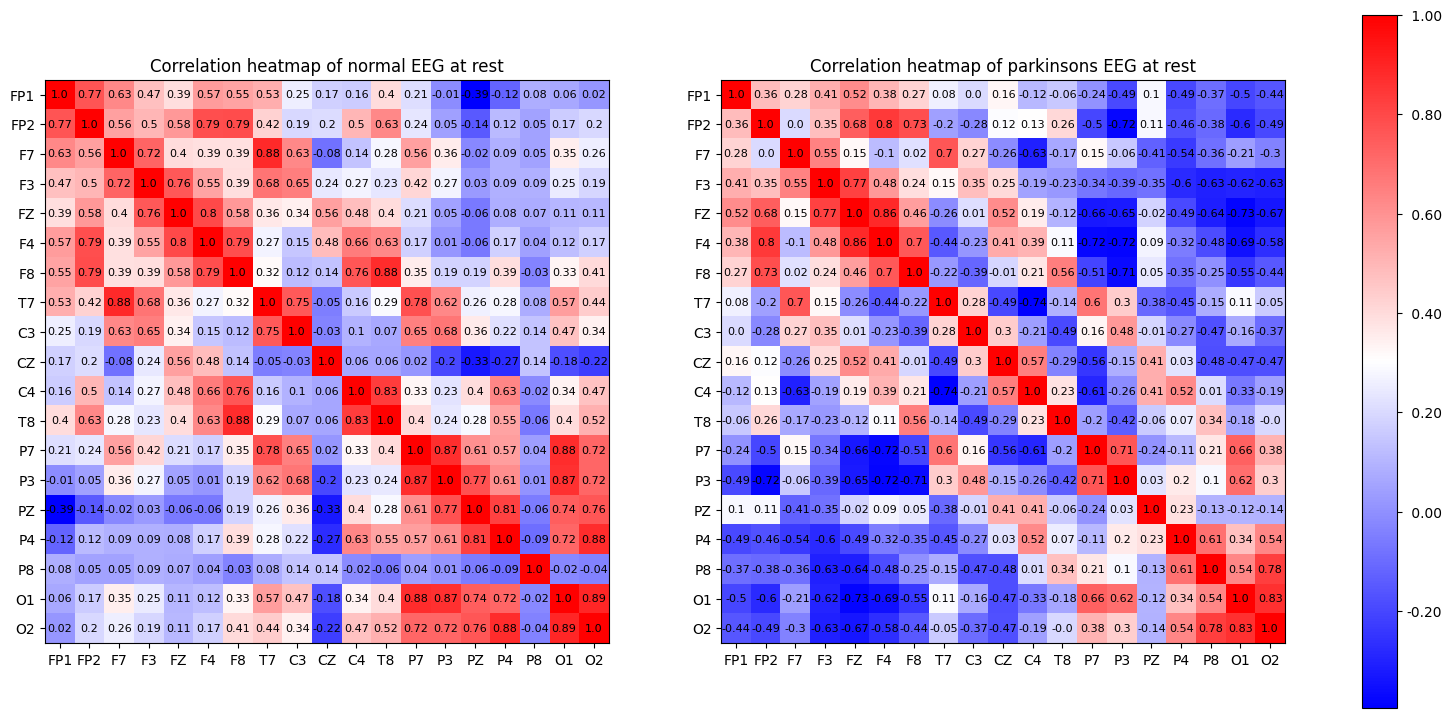

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20, 9))

im1 = ax[0].imshow(R_r, cmap='bwr')
im2 = ax[1].imshow(R_rp, cmap='bwr')
# im.set_clim(-1, 1)
ax[0].grid(False)
# ax.autoscale(False)
ax[0].xaxis.set_major_locator(plt.MaxNLocator(19))
ax[0].yaxis.set_major_locator(plt.MaxNLocator(19))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(19))
ax[1].yaxis.set_major_locator(plt.MaxNLocator(19))

# A FuncFormatter is created automatically.
ax[0].xaxis.set_major_formatter(format_fn)
ax[0].yaxis.set_major_formatter(format_fn)
ax[1].xaxis.set_major_formatter(format_fn)
ax[1].yaxis.set_major_formatter(format_fn)

ax[0].set_title('Correlation heatmap of normal EEG at rest', fontsize='large')
ax[1].set_title('Correlation heatmap of parkinsons EEG at rest', fontsize='large')

for i in xs:
    for j in ys:
        ax[0].text(j, i, round(R_r[i, j], 2), ha='center', va='center', color='black', size=8)

for i in xs:
    for j in ys:
        ax[1].text(j, i, round(R_rp[i, j], 2), ha='center', va='center', color='black', size=8)


cbar = ax[0].figure.colorbar(im1, ax=ax, format='% .2f')
plt.show()

As expected, the diagonal of the correlation matrix shows the correlation between each EEG node and itself, which is guranteed to be 1 as they are perfectly correlated.

Looking at the heatmap we can see that in the parksinson's patient has much less correlation between nodes in general. The nodes are ordered by placement, F nodes read brain activity from the front of the brain and O nodes read from the backside of the brain. Keeping that in mind we can also see that parkinsons patients also have more of a disconnect from the front to the back.

[EEG node supplemental reading](https://en.wikipedia.org/wiki/10%E2%80%9320_system_(EEG))


## (e) Repeat (d) for the ‘squeezing’ state.

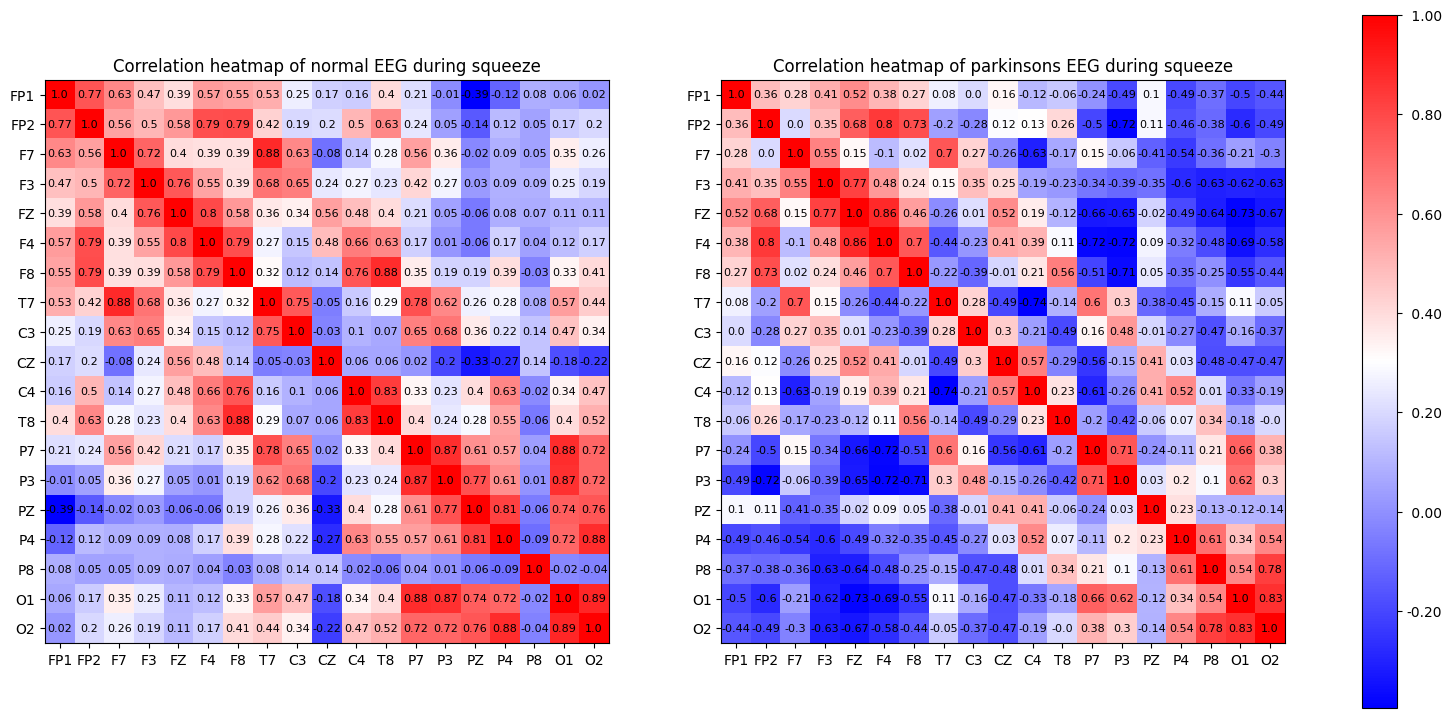

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20, 9))

im1 = ax[0].imshow(R_s, cmap='bwr')
im2 = ax[1].imshow(R_sp, cmap='bwr')
# im.set_clim(-1, 1)
ax[0].grid(False)
# ax.autoscale(False)
ax[0].xaxis.set_major_locator(plt.MaxNLocator(19))
ax[0].yaxis.set_major_locator(plt.MaxNLocator(19))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(19))
ax[1].yaxis.set_major_locator(plt.MaxNLocator(19))

# A FuncFormatter is created automatically.
ax[0].xaxis.set_major_formatter(format_fn)
ax[0].yaxis.set_major_formatter(format_fn)
ax[1].xaxis.set_major_formatter(format_fn)
ax[1].yaxis.set_major_formatter(format_fn)

ax[0].set_title('Correlation heatmap of normal EEG during squeeze', fontsize='large')
ax[1].set_title('Correlation heatmap of parkinsons EEG during squeeze', fontsize='large')

for i in xs:
    for j in ys:
        ax[0].text(j, i, round(R_s[i, j], 2), ha='center', va='center', color='black', size=8)

for i in xs:
    for j in ys:
        ax[1].text(j, i, round(R_sp[i, j], 2), ha='center', va='center', color='black', size=8)


cbar = ax[1].figure.colorbar(im1, ax=ax, format='% .2f')
plt.show()

## Appendix

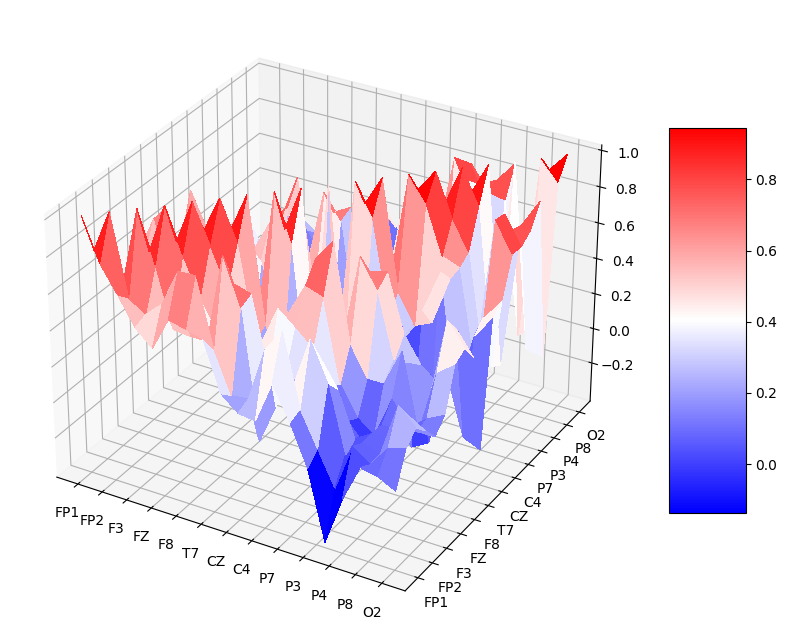

In [ ]:

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10) )

# Make data.
X = np.arange(0, 19, 1)
Y = np.arange(0, 19, 1)
X, Y = np.meshgrid(X, Y)
Z = R_r
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='bwr',
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.yaxis.set_major_locator(plt.MaxNLocator(19))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')
ax.xaxis.set_major_formatter(format_fn)
ax.yaxis.set_major_formatter(format_fn)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

I'm aware that using seaborn and pandas dataframes would be much simpler for plotting the heatmaps and showing the data but I did it this way for the challenge and pyplot refresher.